In [1]:
# prepare data
from data_utils import get_data, session_num
dataset_used = 'MNIST' #'CIFAR10' #'FashionMNIST' #'MNIST', 'MPII', 'UTD'
train_data_loader, val_data_loader, __ = get_data(dataset_used, 1)


Train size:  54000


In [2]:
# load model
from classifier import Classifier
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
import torch 

device = 'cuda'
model = Classifier(n_class=10).to(device)
model_name = 'classifier'+'_'+dataset_used+'_'+str(session_num)
model.load_state_dict(torch.load('models/'+model_name+'.pth'))
model.eval();

In [3]:
correct_num = 0
val_num = 0
for batch in val_data_loader:
    if batch[0] is None:
        continue
    if dataset_used in ['MNIST', 'UTD', 'FashionMNIST', 'CIFAR10']:
        img, label = batch[0].to(device), batch[1].to(device)
#     elif dataset_used == 'MPII':
#         img = batch['image'].to(device)
        
    pred = model(img)
    correct_num += label.item() == torch.argmax(pred).item()
    val_num += 1
print('Accuracy: {}'.format(correct_num/val_num))

/home/cookiekop/anaconda3/envs/ActionReplay/lib/python3.7/site-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy: 0.19516666666666665


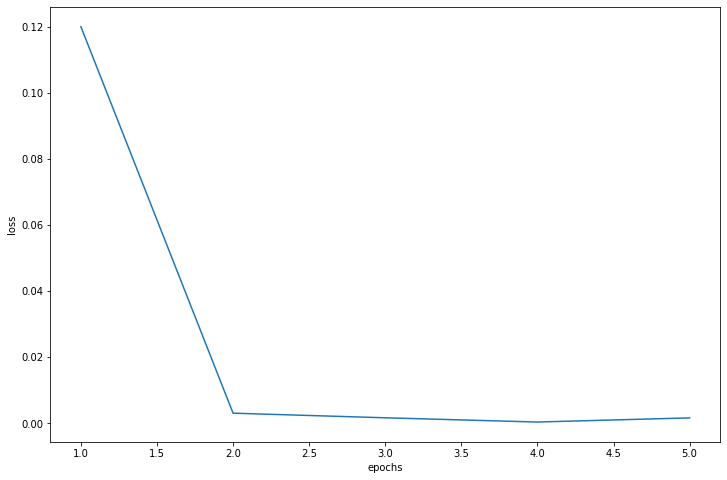

In [4]:
# plot training curve
import json

with open('logs/'+model_name+'.json', 'r') as f:
    losses = json.load(f)

x = range(1, len(losses)+1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, losses)
ax.set_ylabel('loss')
ax.set_xlabel('epochs')
plt.show()